### GA application in predict Sales price

**Triển khai thuật toán**
1. Khai báo các tham số cần thiết:
- *n*: size of individual
- *m*: size of population
- *n_generations*: number of generations
- *losses*: lưu giá trị loss để vẽ biểu đồ
2. Khởi tạo các hàm tính toán cần thiết: các bạn có thể đặt tên khác, nhưng phải rõ nghĩa, và
tuân theo quy tắc đặt tên hàm
- *compute_loss(individual)*: hàm tính loss theo individual (trọng số)
- *compute_fitness(individual)*:
- *create_individual()*: tạo một cá thể (tham số theta)
- *crossover(individual1, individual2, crossover_rate = 0.9)*: hàm crossover giữa 2 individual
- *mutate(individual, mutation_rate = 0.05)*: hàm mutation
- *selection(sorted_old_population)*: hàm chọn lọc
- *create_new_population(old_population, elitism=2, gen=1)*: hàm tạo population mới
3. Thực hiện huấn luyện:
- *Initial Population*: Khởi tạo quần thể (population) một cách ngẫu nhiên
- *Fitness function*: Hàm đánh giá độ tốt của một cá thể. Giá trị càng lớn thì cá thể càng tốt.
- *Selection*: Bước chọn lọc những cá thể tốt trong quần thể
- *Cross-over*: Bước lai tạo (trao đổi gen) giữa các cá thể.
- *Mutation*: Bước đột biến cho một cá thể (thay đổi gen một cách ngẫu nhiên)
<br>
<br>
Giải thuật GAs thực hiện bước *Initial Population* một lần ban đầu, và các bước từ *Fitness function* đến *Mutation* được thực hiện cho mỗi generation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(0)

def load_data_from_file(filepath):
    data = np.array(pd.read_csv(filepath))
    m, n = data.shape[0], data.shape[1]
    features_X = np.hstack((np.ones((m, 1)), data[:, :-1]))
    sales_Y = data[:, -1]

    return m, n, features_X, sales_Y   

In [55]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound


def create_individual(n=4, bound=10):
    '''
    Khởi tạo ngẫu nhiên giá trị của n genes (tham số θi) trong chromosome 
    với giá trị từng gene được khởi tạo [-bound/2, bound/2]
    '''
    individual = []
    for i in range(n):
        indi = random.uniform(-bound/2, bound/2)
        individual.append(indi)

    return individual

In [15]:
m, n, features_X, sales_Y = load_data_from_file(filepath)
def compute_loss(individual):
    theta = np.array(individual)    # (n,)
    y_hat = features_X.dot(theta)   # features_X.shape = (m, n) =>  y_hat.shape = (m,)    
    loss = np.mean((y_hat - sales_Y)**2)  
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss + 1)        
    return fitness
    

In [17]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    indi1 = individual1.copy()
    indi2 = individual2.copy()

    for i in range(len(indi1)):
        if np.random.random() < crossover_rate:
            indi1[i] = individual2[i]
            indi2[i] = individual1[i]

    return indi1, indi2

In [20]:
def mutate(individual, mutation_rate = 0.05):
    indi = individual.copy()
    for i in range(len(indi)):
        if random.random() < mutation_rate:
            indi[i] = random.uniform(-100, 100)
    return indi

In [22]:
def initializePopolation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [33]:
# Tournament selection???

def selection(sorted_old_population, m = 100):
    idx1 = np.random.randint(0, m-1)
    while True:
        idx2 = np.random.randint(0, m-1)
        if idx1 != idx2:
            break
    
    if idx2 > idx1:
        return sorted_old_population[idx2]
    else:
        return sorted_old_population[idx1]


In [27]:
def create_new_population(old_population, elitism=2, gen=1):
    '''
    Sử dụng giải thuât Elitist để đảm bảo rằng elitism cá thể tốt nhất không bị loại bỏ, 
    bằng cách chuyển chúng trực tiếp sang thế hệ tiếp theo.
    '''
    m = len(old_population)
    sorted_old_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print('Best loss:', compute_loss(sorted_old_population[-1]), 'with chromsome:', sorted_old_population[-1])
    
    new_population = []
    while len(new_population) < m - elitism:
        # selection
        indi1 = selection(sorted_old_population, m)
        indi2 = selection(sorted_old_population, m)

        # crossover
        indi1_c, indi2_c = crossover(indi1, indi2)

        # mutation
        indi1_m = mutate(indi1_c)
        indi2_m = mutate(indi2_c)

        # append to new population
        new_population.extend([indi1_m, indi2_m])

    # keep elitism chromsomes with best fitness score to next generation
    new_population.extend(sorted_old_population[-elitism:])

    return new_population, compute_loss(sorted_old_population[-1])


In [56]:
# ALL-IN-ONE
def run_GA():
    n_generations = 200
    m = 600
    elitism = 2
    n_samples, n, features_X, sales_Y = load_data_from_file(filepath = r"D:\\advertising.csv")
    population = initializePopolation(m)
    best_losses = []

    for i in range(n_generations):
        new_population, best_loss = create_new_population(population, elitism=elitism)
        best_losses.append(best_loss)
        if len(new_population) > m:
            population = new_population[:-elitism+1].extend(new_population[-elitism:])
        else:
            population = new_population

    return best_losses, population[-1]    

Best loss: 1428.7137295129692 with chromsome: [-1.7815582471724198, -0.06517173829832146, 0.030006216822141774, 1.468609590564574]
Best loss: 892.8656147555229 with chromsome: [-1.2490176713846846, 0.2871838989704587, -1.5417063269580265, 0.4018652769703559]
Best loss: 892.8656147555229 with chromsome: [-1.2490176713846846, 0.2871838989704587, -1.5417063269580265, 0.4018652769703559]
Best loss: 559.4223961572026 with chromsome: [4.759319502567186, 0.12391834862495443, -0.301353915030119, 0.5990581594820252]
Best loss: 6.866587359719628 with chromsome: [3.7509747123687323, 0.060587356905789314, 0.10019575985996276, 0.05574551229043845]
Best loss: 6.866587359719628 with chromsome: [3.7509747123687323, 0.060587356905789314, 0.10019575985996276, 0.05574551229043845]
Best loss: 6.866587359719628 with chromsome: [3.7509747123687323, 0.060587356905789314, 0.10019575985996276, 0.05574551229043845]
Best loss: 6.866587359719628 with chromsome: [3.7509747123687323, 0.060587356905789314, 0.1001957

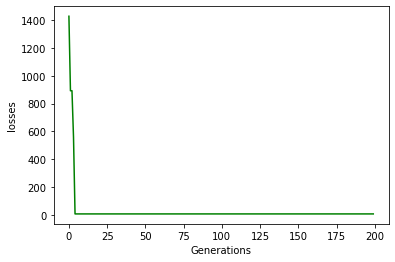

In [57]:
def visualize_loss(loss_list):
    plt.plot(loss_list, color='green')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

loss_list, optimal_theta = run_GA()
visualize_loss(loss_list)

In [58]:
def visualize_predict_groundtruth():
    '''
    Visualization of ground truth and predict value
    '''
    theta = np.array(optimal_theta)
    estimated_price = []
    for feature in features_X:
        estimated_price.append(theta.dot(feature))
    
    fig = plt.figure(figsize=(18,6))
    plt.plot(sales_Y, color='blue', label='Real Prices')
    plt.plot(estimated_price, color='green', label='Estimated Prices')
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

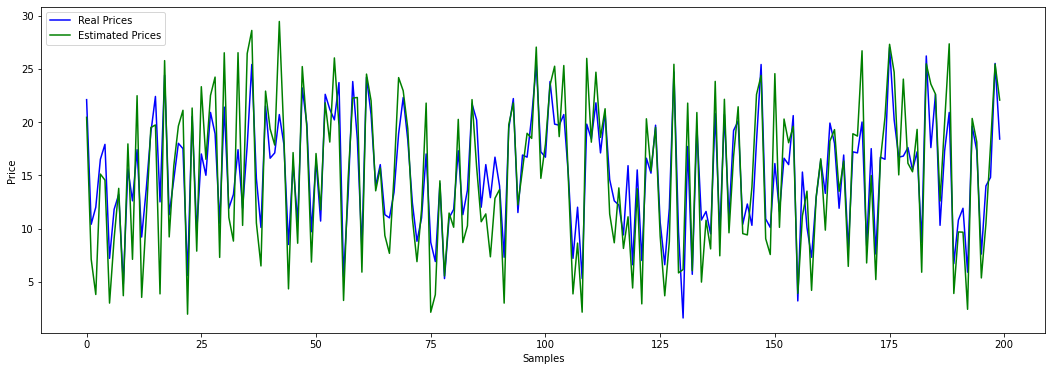

In [49]:
visualize_predict_groundtruth()